In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle
from collections import defaultdict
from sklearn.manifold import TSNE

## how does the sampled data point look like? which are sampled, unlabeled, labeled?

In [3]:
def read_embedding_results(cycle):
    features = np.load(f'{base_path}/{folder}_{cycle}_features.npy')
    features_label = np.load(f'{base_path}/{folder}_{cycle}_features_label.npy')
    labeled_indices = np.load(f'{base_path}/{folder}_{cycle}_labeled_indices.npy')

    return [features, features_label, labeled_indices]

features, features_label, labeled_indices = [], [], []

# for i,run_id in enumerate([20240629]): #20240610,20240622
#     dataset = 'SnapshotSerengetiSmall'
#     method = 'mobyv2al'
#     # run_id = [20240622,20240610,20240629]
#     base_path = f'/Volumes/data01/waitsun/result_data_analysis/{dataset}_{method}_{run_id}'
#     folder = f'{dataset}_{method}_{run_id}'

dataset = 'SnapshotSerengeti10'
method = 'mobyv2al'
run_id = 20240717
base_path = f'/Volumes/data01/waitsun/result_data_analysis/{dataset}_{method}_{run_id}'
folder = f'{dataset}_{method}_{run_id}'

for cycle in range(10):
    results = read_embedding_results(cycle)
    features.append(results[0])
    features_label.append(results[1])
    labeled_indices.append(results[2])
        




In [4]:
tsne_embeddings = []
for i in range(10):
    tsne = TSNE(n_components=2, random_state=1234,n_jobs=-1)
    tmp = tsne.fit_transform(features[i])
    tsne_embeddings.append(tmp)

/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE w

In [9]:
import pickle

# with open('tsne_embeddings_corelb.pkl', 'wb') as file:
#     pickle.dump(tsne_embeddings, file)

# with open('tsne_embeddings_corelb.pkl', 'rb') as file:
#     tsne_embeddings= pickle.load(file)

In [5]:
with open('tsne_embeddings_coreset_snapshot10.pkl', 'wb') as file:
    pickle.dump(tsne_embeddings, file)

In [7]:
import random
NUM_TRAIN = 512522
indices = list(range(NUM_TRAIN))
random.seed(1234)
random.shuffle(indices)

In [8]:
len(labeled_indices[1])

9500

In [9]:
sampled_indices = []
sampled_indices_position = []

for i in range(0,10,1):
    if i <=0:
        tmp = [(li, index) for  index,li in enumerate(labeled_indices[i]) if li not in indices[:5000]]
        tmp,pos = zip(*tmp)
    else:    
        tmp = [(li,index) for  index,li in enumerate(labeled_indices[i]) if li not in labeled_indices[i-1]]
        tmp,pos = zip(*tmp)
    sampled_indices.append(tmp)
    sampled_indices_position.append(pos)



In [6]:
print(len(labeled_indices[0]))
print(len(sampled_indices[0]))

7000
2546


In [10]:
sampled_labels = []
for i in range(10):
    tmp = [features_label[i][index] for index in sampled_indices_position[i]]
    sampled_labels.append(tmp)

    

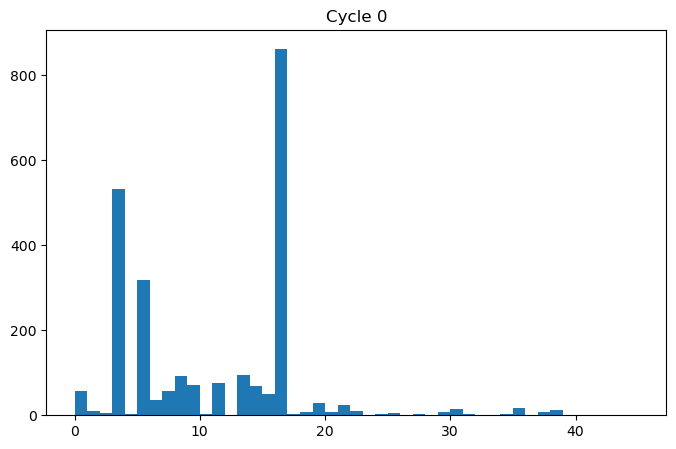

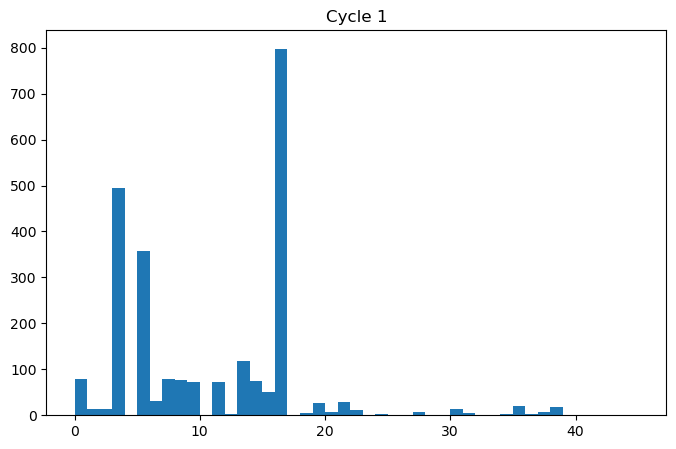

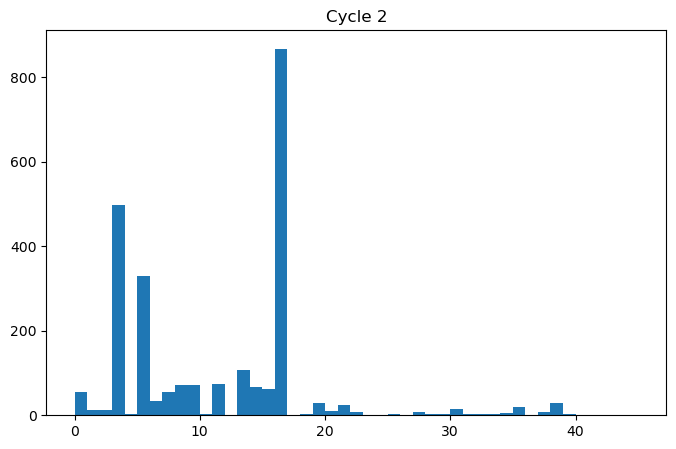

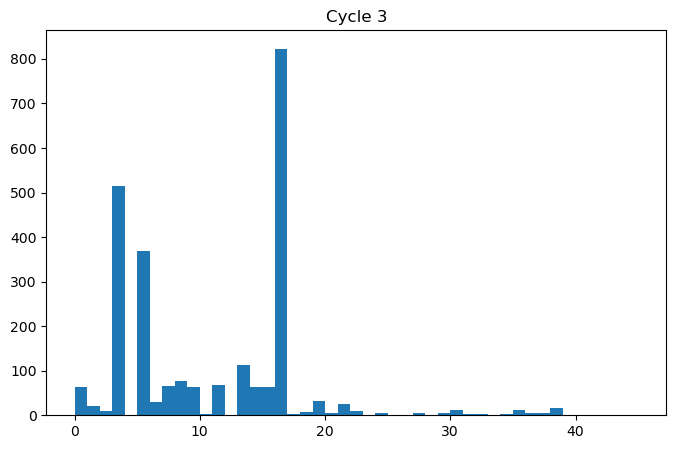

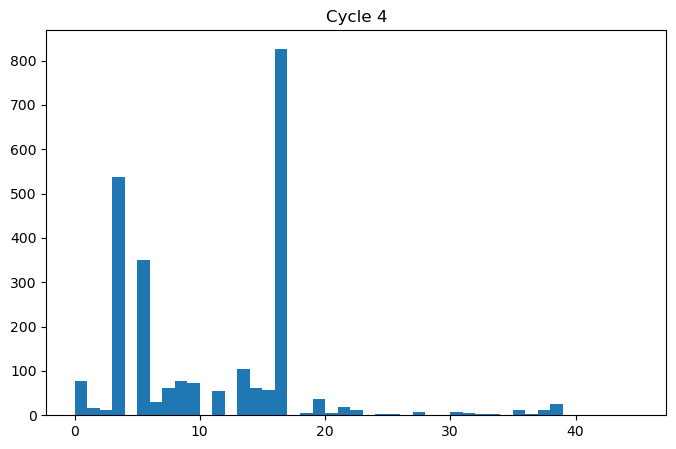

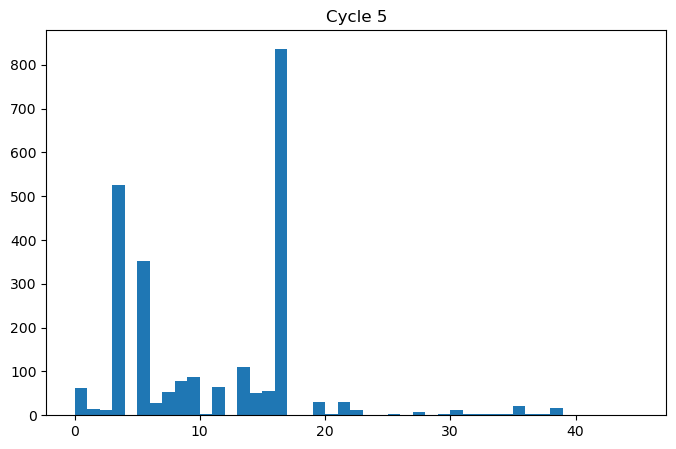

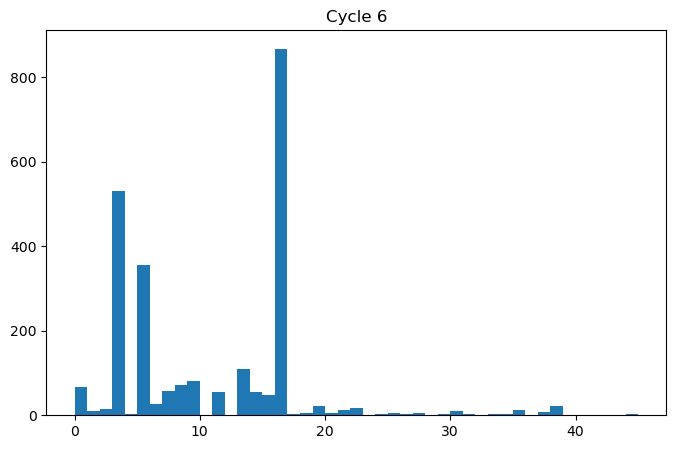

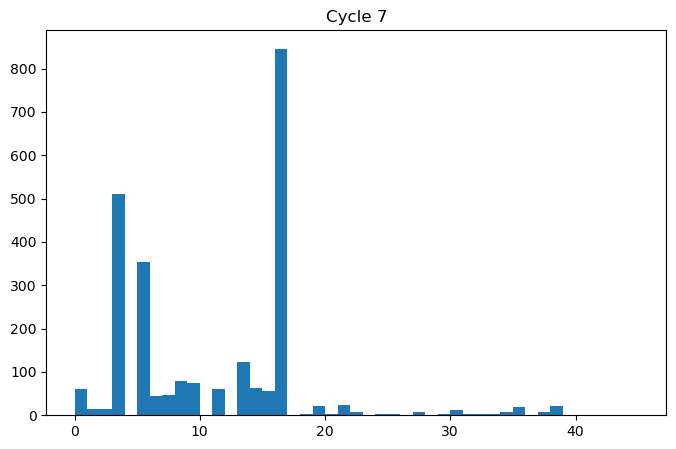

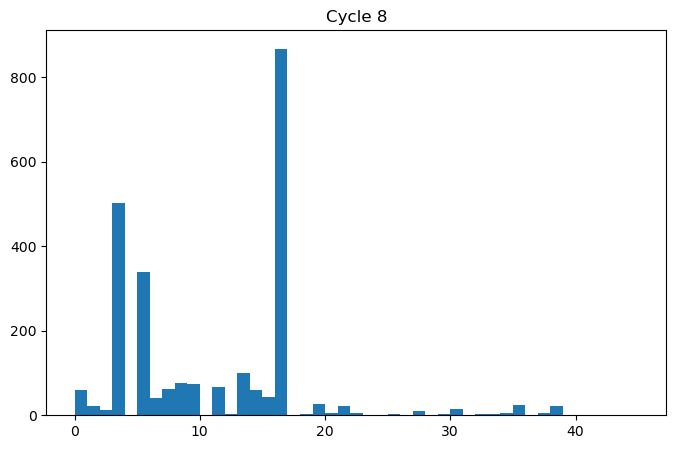

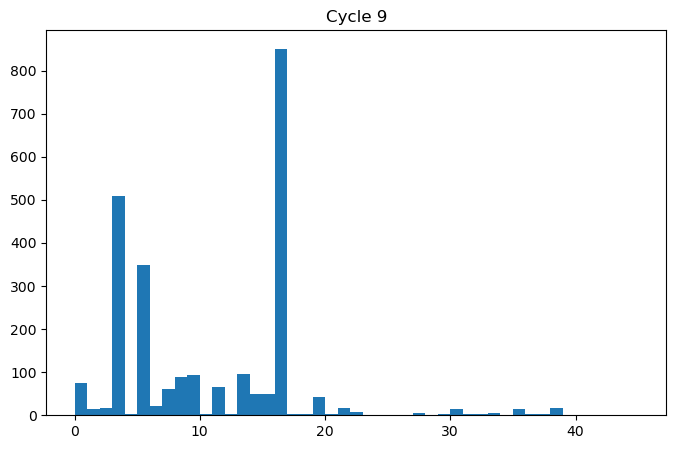

In [9]:
for i in range(10):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.hist(sampled_labels[i],bins=np.arange(0,46,1))
    ax.set_title(f'Cycle {i}')

In [13]:
lut = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_category_lut_adapted.df')
df_test = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_test.df')
df_train = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_train.df')

/var/folders/5f/83w09gxd6pq0h169x9168wcw0000gn/T/ipykernel_77683/474735903.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(species_name,rotation=90)


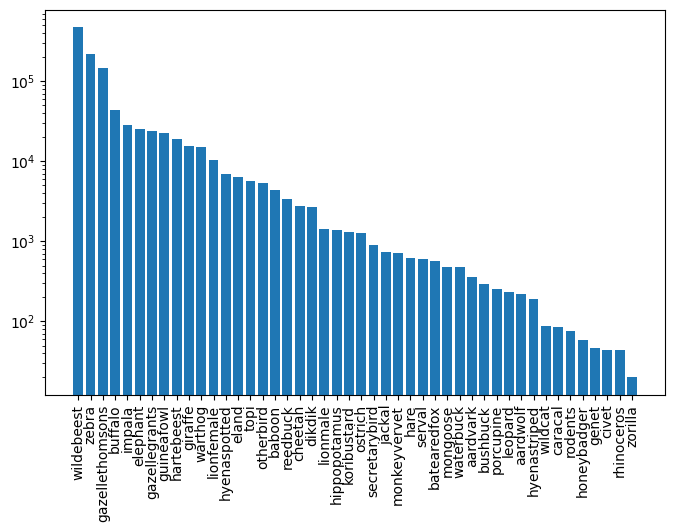

/var/folders/5f/83w09gxd6pq0h169x9168wcw0000gn/T/ipykernel_77683/474735903.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(species_name,rotation=90)


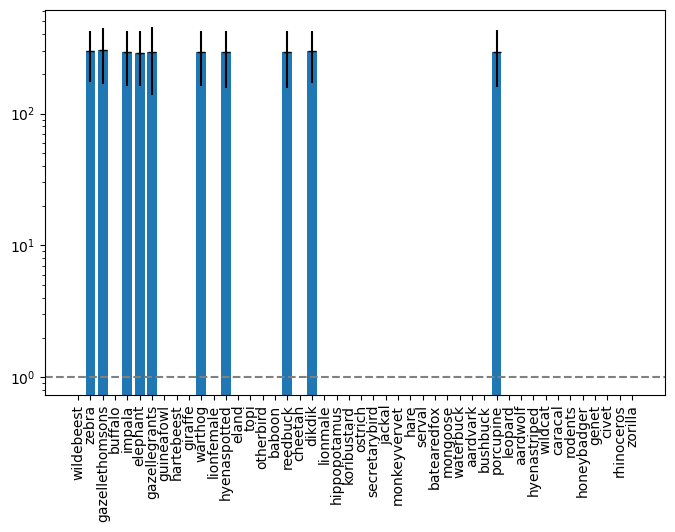

In [14]:


category, num = zip(*list(df_train['category_id'].value_counts().items()))

category = np.array(category)
num = np.array(num)

sorted_a = np.argsort(category)
species_name = [lut.name[i] for i in category]
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(species_name,num,log=True)
ax.set_xticklabels(species_name,rotation=90)
plt.show()

counts_mean = np.zeros((10,46))
for i in range(10):
    unique_values, counts = np.unique(sampled_labels[i],return_counts=True)
    for j in range(len(unique_values)):
        counts_mean[i,unique_values[j]] = counts[j]

counts_std = counts_mean.std(axis=0)
counts_mean = np.mean(counts_mean, axis=0)

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(species_name,counts_mean[category],log=True)
ax.errorbar(species_name,counts_mean[category],yerr=counts_std[category],fmt='_',color='black')
ax.set_xticklabels(species_name,rotation=90)
ax.axhline(y=1, color='grey', linestyle='--')
plt.show()



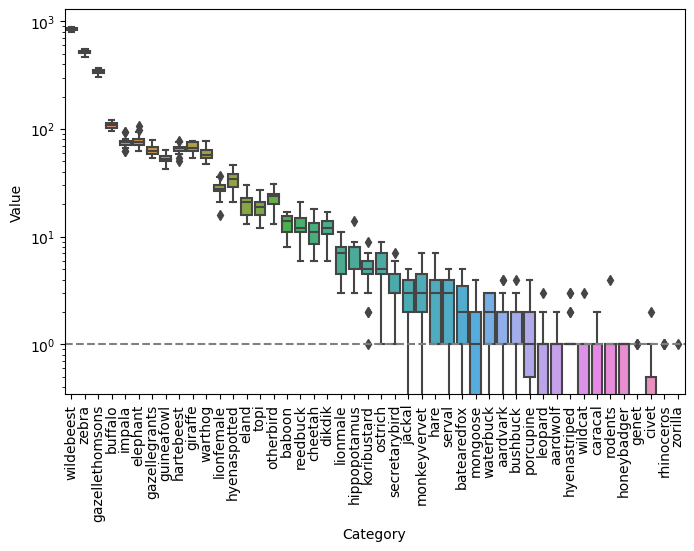

In [180]:
import seaborn as sns

bbox = {
    'Category': [],
    'Value': []
}

for i in range(len(sampled_labels)):
    unique_values, counts = np.unique(sampled_labels[i],return_counts=True)
    for cat_id, count in zip(unique_values,counts):
        bbox['Category'].append(cat_id)
        bbox['Value'].append(count)

    for i in range(46):
        if i not in unique_values:
            bbox['Category'].append(i)
            bbox['Value'].append(0)

df = pd.DataFrame(bbox)
df['Category'] = pd.Categorical(df['Category'], categories=category.tolist(), ordered=False)
df = df.sort_values('Category')
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data= df, x='Category', y='Value',ax=ax)
# ax.errorbar(species_name,counts_mean[category],yerr=counts_std[category],fmt='_',color='black')
ax.set_xticklabels(species_name,rotation=90)
ax.axhline(y=1, color='grey', linestyle='--')
# ax.set_ylim(0,10)
ax.set_yscale('log')
plt.show()

In [178]:
pd.to_pickle(df,'boxplot_corelb.df')

In [15]:
np.save('counts_mean_coreset_full_epoch.npy',counts_mean)
np.save('counts_std_coreset_full_epoch.npy',counts_std)

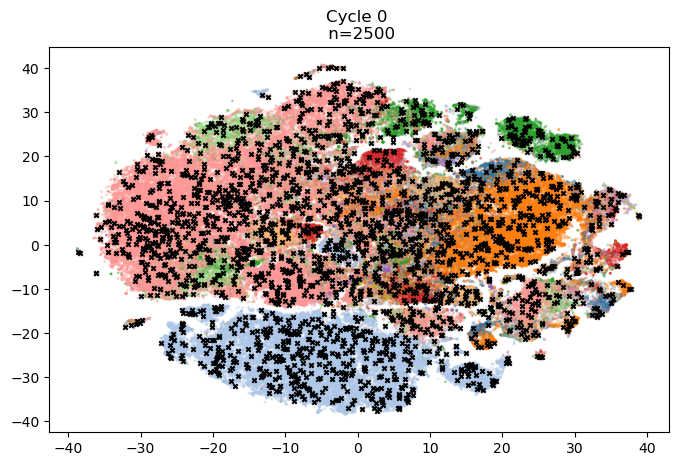

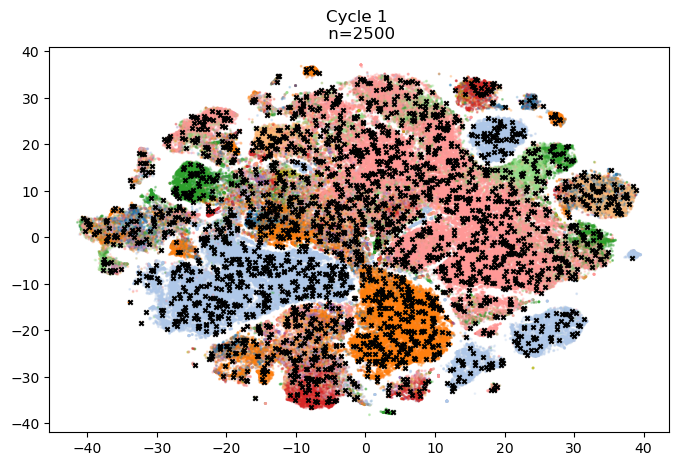

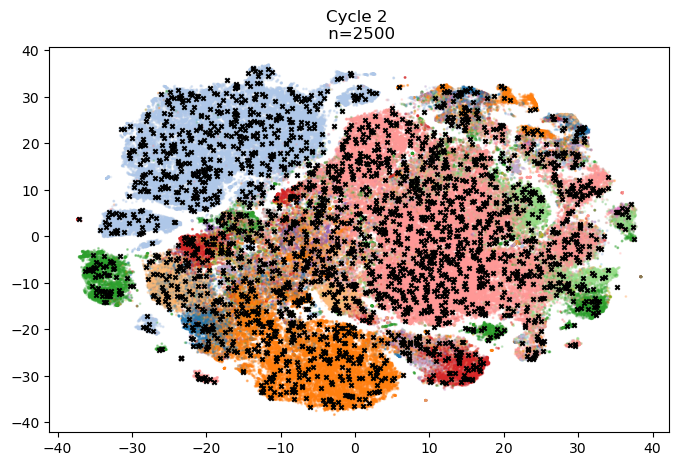

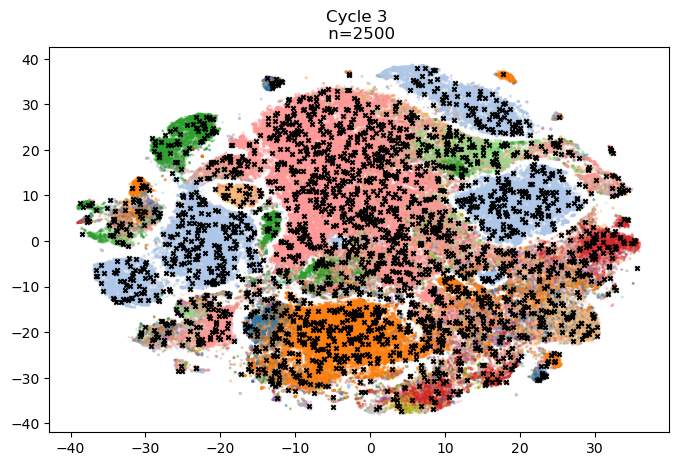

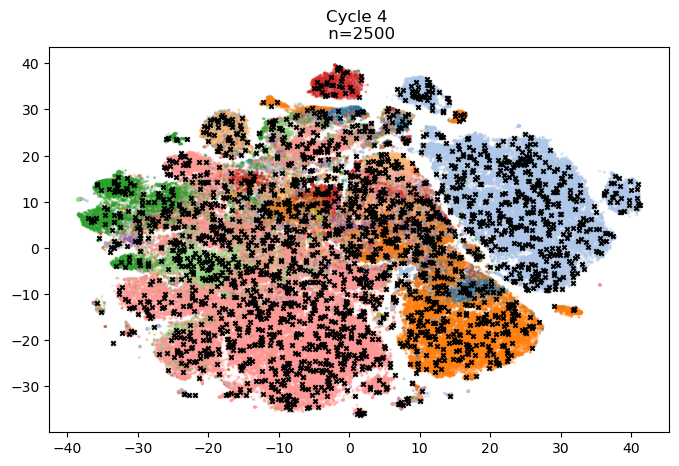

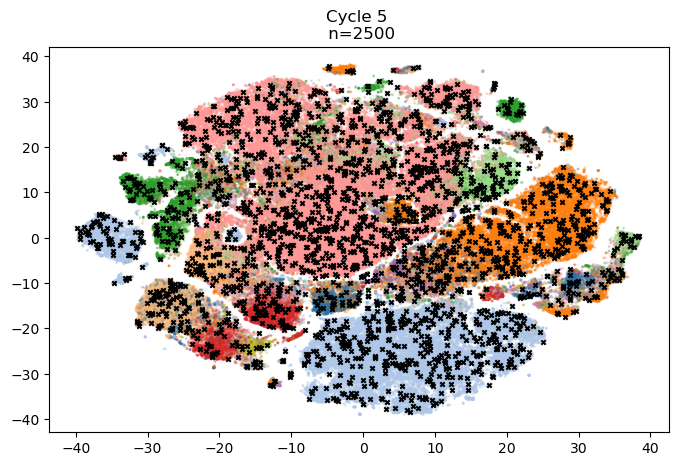

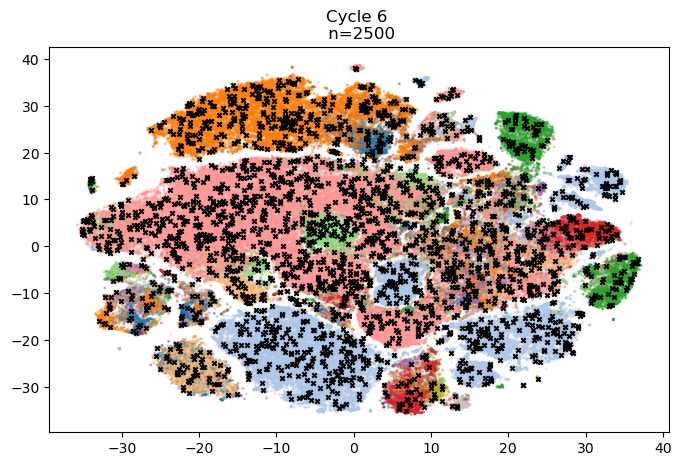

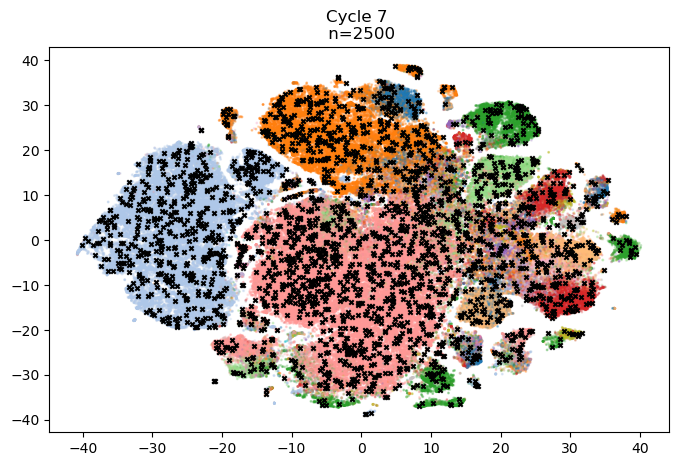

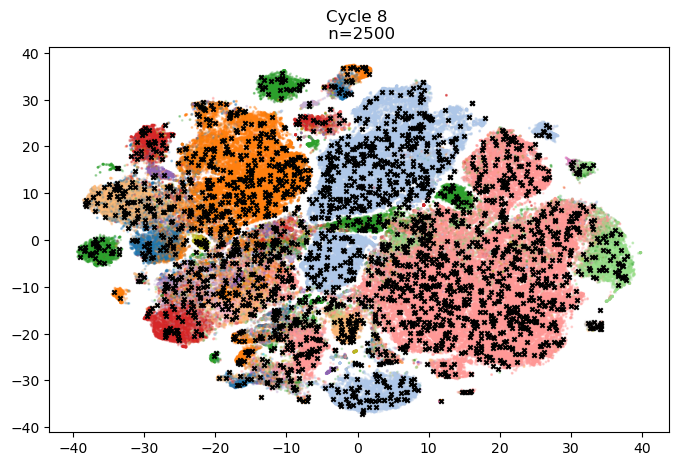

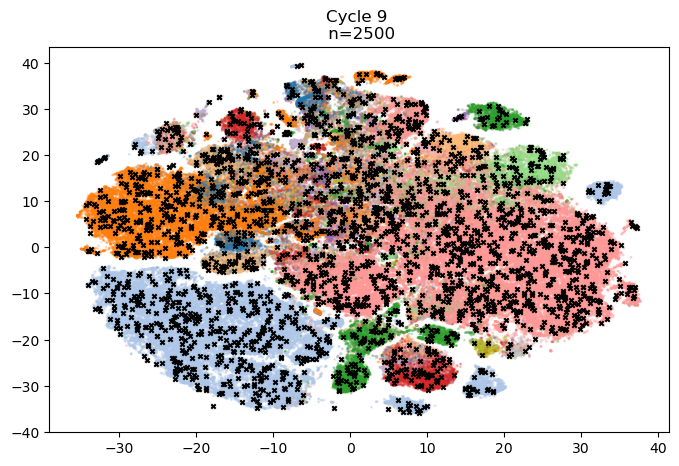

In [12]:
for i in range(10):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(tsne_embeddings[i][:,0],tsne_embeddings[i][:,1],c=features_label[i],s=1,cmap='tab20',alpha=0.2)
    ax.scatter(tsne_embeddings[i][sampled_indices_position[i],0],tsne_embeddings[i][sampled_indices_position[i],1],c='black',s=10,marker='x')
    ax.set_title(f'Cycle {i} \n n={len(tsne_embeddings[i][sampled_indices_position[i],0])}')
               

In [15]:
tsne_embeddings
cylce = 0
colors = plt.get_cmap('tab20').colors
markers = ['+','x','v']
min_lim = np.min(tsne_embeddings[cycle])
max_lim = np.max(tsne_embeddings[cycle])
fig, axes = plt.subplots(6,8,figsize=(50, 50),dpi=300)
for i,ax in enumerate(axes.flatten()):
    if i >=46:
        continue
    positions = np.where(features_label[cycle]== i)
    np.where(features_label[cycle].any() in sampled_indices_position[cycle])
    # if len(positions[0]) > 50:
    #     positions = positions[0][:50]
    # else:
    #     positions = positions[0]
    tsne_embeddings_i = tsne_embeddings[cycle][positions]
    sampled_tsne_embeddings_i = [pos for pos in positions[0] if pos in sampled_indices_position[cycle]]

    ax.scatter(tsne_embeddings_i[:,0], tsne_embeddings_i[:,1], cmap=colors[i%20] ,s=30, marker=markers[i//20])
    ax.scatter(tsne_embeddings[cycle][sampled_tsne_embeddings_i,0], tsne_embeddings[cycle][sampled_tsne_embeddings_i,1], c='black',s=30, marker='x')
    ax.set_title(f'Class {lut.name[i]}')
    ax.set_xlim(min_lim, max_lim)
    ax.set_ylim(min_lim, max_lim)

fig.suptitle(f'CoreLB')
plt.show()

/var/folders/5f/83w09gxd6pq0h169x9168wcw0000gn/T/ipykernel_77683/4231074279.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(tsne_embeddings_i[:,0], tsne_embeddings_i[:,1], cmap=colors[i%20] ,s=30, marker=markers[i//20])


In [ ]:
for i in range()

In [105]:

colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.74117647

In [74]:
train_df = pd.read_pickle(f'/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_train.df')
train_df


img_name  \
0        S1/L07/L07_R1/S1_L07_R1_PICT0103   
1        S1/L07/L07_R1/S1_L07_R1_PICT0234   
2        S1/L07/L07_R1/S1_L07_R1_PICT0072   
3        S1/L07/L07_R1/S1_L07_R1_PICT0020   
4        S1/L07/L07_R1/S1_L07_R1_PICT0122   
...                                   ...   
1094425  S5/K02/K02_R3/S5_K02_R3_IMAG0087   
1094426  S5/K02/K02_R3/S5_K02_R3_IMAG0279   
1094427  S5/K02/K02_R3/S5_K02_R3_IMAG0301   
1094428  S5/K02/K02_R3/S5_K02_R3_IMAG0146   
1094429  S5/K02/K02_R3/S5_K02_R3_IMAG0208   

                                          bbox_pixel_level  category_id  \
0          [178.91328, 0.0, 1585.9712, 1440.9216000000001]           11   
1                    [1268.1216, 0.0, 771.8912, 1408.8192]           11   
2           [33.32096, 0.0, 2014.6176, 1446.2975999999999]            9   
3        [0.3639296, 1133.4144000000001, 131.21536, 300...           16   
4        [719.872, 14.737919999999999, 1327.9232, 1253....           11   
...                                                    ...          ...   
1094425  [1830.912, 69.2736, 216.8832, 1012.0704000000001]           11   
1094426           [11.917312, 89.3184, 648.3968, 1373.184]            3   
1094427  [0.0, 390.60480000000007, 1208.5248, 804.55680...           13   
1094428            [2.7648, 277.8624, 535.1424, 1157.0688]           16   
1094429                    [0.0, 0.0, 884.3264, 1503.8976]           13   

                                     resized_name  
0              S1/L07/L07_R1/S1_L07_R1_PICT0103_0  
1              S1/L07/L07_R1/S1_L07_R1_PICT0234_1  
2              S1/L07/L07_R1/S1_L07_R1_PICT0072_2  
3              S1/L07/L07_R1/S1_L07_R1_PICT0020_3  
4              S1/L07/L07_R1/S1_L07_R1_PICT0122_4  
...                                           ...  
1094425  S5/K02/K02_R3/S5_K02_R3_IMAG0087_1461185  
1094426  S5/K02/K02_R3/S5_K02_R3_IMAG0279_1461186  
1094427  S5/K02/K02_R3/S5_K02_R3_IMAG0301_1461187  
1094428  S5/K02/K02_R3/S5_K02_R3_IMAG0146_1461188  
1094429  S5/K02/K02_R3/S5_K02_R3_IMAG0208_1461189  

[1094080 rows x 4 columns]